In [3]:
from src.utils import *
import pandas as pd
from Bio.PDB import MMCIFParser
import numpy as np

#PDB=4HFZ_1 source: https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2Fanie.202213362&file=anie202213362-sup-0001-misc_information.pdf
MDM2="SQIPASEQETLVRPKPLLLKLLKSVGAQKDTYTMKEVLFYLGQYIMTKRLYDAAQQHIVYCSNDLLGDLFGVPSFSVKEHRKIYTMIYRNLVVVNQQESSDSGTSVSEN"
db=pd.read_csv("./data/MDM2-MDMX_peptides.csv",sep=";")

db['MDM2 (nM)'] = db['MDM2 (nM)'].replace('Inactive', 10000).astype(int) # assuming that >10k = inactive
db['IC50_Rank'] = db['MDM2 (nM)'].rank(method='min', ascending=True)

db

,Name,Sequence,MDM2 (nM),MDMX (nM),IC50_Rank
0,PDIQ,ETFEHWWSQLLS,8,110,1.0
1,pMI,TSFAEYWNLLSP,20,40,2.0
2,6W11L,LTFEHWWAQLLS,20,140,2.0
3,1E6W,ETFEHWWAQLTS,20,200,2.0
4,6W8S,LTFEHWWSQLTS,24,180,5.0
5,6W,LTFEHWWAQLTS,36,250,6.0
6,PDI,LTFEHYWAQLTS,44,550,7.0
7,6W9S,LTFEHWWASLTS,125,500,8.0
8,6W8S9S,LTFEHWWSSLTS,130,800,9.0
9,6N,LTFEHNWAQLTS,400,4000,10.0


### Identify Reference peptide

In [5]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(MDM2, peptide, [], []))
# db['ESM2_initialLoss'] = db['Peptide_Experimental'].apply(lambda peptide: compute_mlm_overall(HTRA1, peptide, [], []))
db

,Name,Sequence,MDM2 (nM),MDMX (nM),IC50_Rank,ESM2_initialLoss
0,PDIQ,ETFEHWWSQLLS,8,110,1.0,20.214684
1,pMI,TSFAEYWNLLSP,20,40,2.0,20.302111
2,6W11L,LTFEHWWAQLLS,20,140,2.0,20.167820
3,1E6W,ETFEHWWAQLTS,20,200,2.0,20.181023
4,6W8S,LTFEHWWSQLTS,24,180,5.0,20.230494
5,6W,LTFEHWWAQLTS,36,250,6.0,20.178221
6,PDI,LTFEHYWAQLTS,44,550,7.0,20.328388
7,6W9S,LTFEHWWASLTS,125,500,8.0,20.234890
8,6W8S9S,LTFEHWWSSLTS,130,800,9.0,20.330173
9,6N,LTFEHNWAQLTS,400,4000,10.0,20.250147


In [7]:
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'LTFTHWWAQLTS'

### Get the binding affinity 

In [8]:
def compute_results(row):
    peptide = row['Sequence']
    MDM2_positions = [] 
    pep_positions = np.array(find_differences(reference_peptide, peptide)) 
    print(reference_peptide, peptide, pep_positions)
    # return compute_mlm_overall(HTRA1, reference_peptide, HTRA_positions, pep_positions)
    return compute_mlm_overall_withoutTheMaskedPos(MDM2, reference_peptide, MDM2_positions, pep_positions)

db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)
db

LTFTHWWAQLTS ETFEHWWSQLLS [ 0  3  7 10]
LTFTHWWAQLTS TSFAEYWNLLSP [ 0  1  3  4  5  7  8 10 11]
LTFTHWWAQLTS LTFEHWWAQLLS [ 3 10]
LTFTHWWAQLTS ETFEHWWAQLTS [0 3]
LTFTHWWAQLTS LTFEHWWSQLTS [3 7]
LTFTHWWAQLTS LTFEHWWAQLTS [3]
LTFTHWWAQLTS LTFEHYWAQLTS [3 5]
LTFTHWWAQLTS LTFEHWWASLTS [3 8]
LTFTHWWAQLTS LTFEHWWSSLTS [3 7 8]
LTFTHWWAQLTS LTFEHNWAQLTS [3 5]
LTFTHWWAQLTS ETFSDLWKLLPE [ 0  3  4  5  7  8 10 11]
LTFTHWWAQLTS LTFEHSWAQLTS [3 5]
LTFTHWWAQLTS ETFEHNWAQLTS [0 3 5]
LTFTHWWAQLTS LTFTHWWAQLTS []


,Name,Sequence,MDM2 (nM),MDMX (nM),IC50_Rank,ESM2_initialLoss,ESM2_ppi_score_overall
0,PDIQ,ETFEHWWSQLLS,8,110,1.0,20.214684,20.219107
1,pMI,TSFAEYWNLLSP,20,40,2.0,20.302111,20.291353
2,6W11L,LTFEHWWAQLLS,20,140,2.0,20.167820,20.213766
3,1E6W,ETFEHWWAQLTS,20,200,2.0,20.181023,20.152370
4,6W8S,LTFEHWWSQLTS,24,180,5.0,20.230494,20.169313
5,6W,LTFEHWWAQLTS,36,250,6.0,20.178221,20.143044
6,PDI,LTFEHYWAQLTS,44,550,7.0,20.328388,20.359461
7,6W9S,LTFEHWWASLTS,125,500,8.0,20.234890,20.180445
8,6W8S9S,LTFEHWWSSLTS,130,800,9.0,20.330173,20.236862
9,6N,LTFEHNWAQLTS,400,4000,10.0,20.250147,20.359461


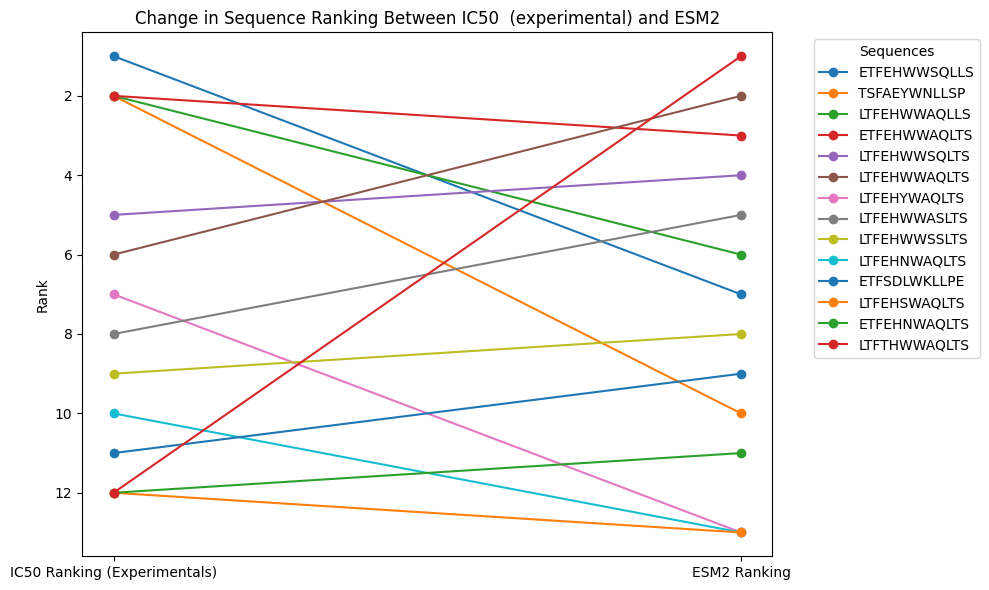

In [11]:
db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
# db['IC50_Rank'] = db['IC50_uM'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import ndcg_score
print("IC50",db["IC50_Rank"].values)
print("ESM2",db['ESM2_ppi_score_overall'].values)
ndcg_score([db["IC50_Rank"].values], [db["ESM2_ppi_score_overall"].values])

IC50 [ 1.  2.  2.  2.  5.  6.  7.  8.  9. 10. 11. 12. 12. 12.]
ESM2 [20.21910667 20.29135323 20.2137661  20.15237045 20.16931343 20.14304352
 20.35946083 20.18044472 20.23686218 20.35946083 20.28152657 20.35946083
 20.34531212 20.10883522]


0.9131166728258338

In [14]:
ndcg_score([db["MDM2 (nM)"].values], [db["ESM2_ppi_score_overall"].values])

0.6728546732940444

In [15]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[ 1  2  2  2  5  6  7  8  9 10 11 12 12 12]
[ 7 10  6  3  4  2 13  5  8 13  9 13 11  1]
Kendall's Tau: 0.21
P-value: 0.3165
